---
<a name = Section0></a>
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Redundant Data**](#Section51)
  - **5.2** [**Handling the Missing Data**](#Section52)
  - **5.3** [**Handling Outliers**](#Section53)


**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Correlation**](#Section61)
  - **6.2** [**Hist Plot**](#Section62)
  - **6.3** [**Categorical Features relation with status**](#Section63)
  - **6.4** [**Continuous Features relation with status**](#Section64)

**7.** [**Post Data Processing and Feature Selection**](#Section7)<br>
  - **7.1** [**Feature Selection**](#Section71)
  - **7.2** [**Encoding Categorical Features**](#Section72)
  - **7.3** [**Data Scaling**](#Section73)
  - **7.4** [**Data Preparation**](#Section74)

**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Build the Model**](#Section81)
  - **8.2** [**Train the Model**](#Section82)
  - **8.3** [**Model Evaluation & Prediction**](#Section83)




---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction**

- Sun and Rise is a weather forecasting and information technology company that owns and operates www.sunNrise.com for weather forecasting.
- Their current objective is to study and monitor climate changes at a national level.
- Hence, they want to make sure that they are delivering quality service in terms of forecasting.

**Current Scenario**

- The company operates in a manner such that they have to manually evaluate the current status of weather.
- Based on that they store data in their databases.Upon that database, they manually evaluate the data and perform forecasting.
- However, this process is very time and resource-consuming. In order to encounter this, they are willing to automate the entire process.



---
<a name = Section2></a>
# **2. Problem Statement**
---
**The current process suffers from the following problems:**

- The current procedure is based on human-based validation of the data points collected. This is very tedious and time-consuming as it needs to be repeated every time.The company has hired you as a data science consultantThey want to automate the process of classifying if rainfall will happen tomorrow or not.
Based on the data given they are willing to use advanced technologies such as artificial intelligence and machine learning in order to execute this project

- The company has hired us as data science consultants. They want to automate the process of predicting rainfall tomorrow

**Our Role**
We have been provided with dataset consisting of records of previously recorded instances of rainfall. Our task is to build a classification model using the dataset.
Because there was no machine learning model for this problem in the company, we don’t have a quantifiable win condition. we need to build the best possible model.

Project Deliverables
Deliverable: Predict If rainfall will happen tomorrow or not..
Machine Learning Task: Classification
Target Variable: RainTomorrow
Win Condition: N/A (best possible model)


[*Go Back to Index*](#Section0)<br>

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [1]:
# Install autotime to monitor the time required for execution
!pip install ipython-autotime

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00
time: 433 µs (started: 2023-06-26 12:38:07 +00:00)


In [2]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-qc_b5y35
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-qc_b5y35
  Resolved https://github.com/tensorflow/docs to commit 4d512c2d7c40d69fcb842978aeaa136e19abe2bb
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.5.26.9808-py3-none-any.whl size=183623 sha256=0b8307dc77a5bac03e0fd9598fd48a91dc8aa7f8e78c92758a24827534d7f22c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sh3sx9dy/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs
time: 19.3 s (started: 2023-06-26 12:38:07 +00:00)


In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from ydata_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)

#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.utils import resample                                  # for resampling if required
from sklearn import preprocessing
from sklearn import impute                                          # for handling missing data
from sklearn.impute import KNNImputer

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#-------------------------------------------------------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras import regularizers

time: 6.73 s (started: 2023-06-26 12:38:26 +00:00)


In [4]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
time: 2.63 ms (started: 2023-06-26 12:38:33 +00:00)


[*Go Back to Index*](#Section0)<br>

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- This database was created to identify the rainfall status of the day after.
- The column RainTomorrow is also present in the dataset which has two values 1 and 0 (Yes/No).
- This is the data that we have to predict for future samples..

**The dataset is divided into two parts: Train and Test sets.**

**Train Set:**
The train set contains 51003 rows and 22 columns.
The last column RainTomorrow is the target variable.

**Test Set:**
The test set contains 12751 rows and 21 columns.
The test set doesn’t contain the RainTomorrow column.

# **DATASET FEATURE DESCRIPTION**

The Dataset contains the following columns

| Id | Features | Description |
| :-- | :--| :--|
|01|Id |	Unique identifier .|
|02|Date |	Date of the record .|
|03|Location |	The location of the record.|
|04|MinTemp|	Minimum temperature of the record.|
|05|MaxTemp|	Maximum temperature of the record .|
|06|Rainfall|	The amount of rain for that day in the record.|
|07|WindGustDir|	Date of the record.|
|08|WindGustSpeed|	Speed of the wind at that record.|
|09|WindDir9am|	Direction of the wind at 09:00 AM .|
|10|WindDir3pm|	Direction of the wind at 03:00 PM .|
|11|WindSpeed9am|	Flow of the wind at 09:00 AM .|
|12|WindSpeed3pm|	Flow of the wind at 03:00 PM.|
|13|Humidity9am| of the wind at 09:00 AM|
|14|Humidity3pm| of the wind at 03::00 PM .|
|15|Pressure9am|	Pressure of the wind at 09:00 AM .|
|16|Pressure3pm|	Pressure of the wind at 03::00 PM .|
|17|Cloud9am|	Cloud presence at 09:00 AM .|
|18|Cloud3pm|	Cloud presence at 03::00 PM .|
|19|Temp9am|	Temperature recorded at 9 AM .|
|20|Temp3pm|	Temperature recorded at 3 PM .|
|21|RainToday|	Rainfall status for today if 0 then No if 1 then Yes.|
|22|RainTomorrow|	Rainfall status for tomorrow if 0 then No if 1 then Yes.|



In [5]:
csmpa = pd.read_excel("https://github.com/Samit8878/samitcolab/blob/main/aus_weather_train.xlsx?raw=true")


time: 42.5 s (started: 2023-06-26 12:38:33 +00:00)


In [6]:
csmpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51003 entries, 0 to 51002
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             51003 non-null  int64         
 1   Date           51003 non-null  datetime64[ns]
 2   Location       51003 non-null  object        
 3   MinTemp        51003 non-null  float64       
 4   MaxTemp        51003 non-null  float64       
 5   Rainfall       51003 non-null  float64       
 6   WindGustDir    51003 non-null  object        
 7   WindGustSpeed  51003 non-null  float64       
 8   WindDir9am     51003 non-null  object        
 9   WindDir3pm     51003 non-null  object        
 10  WindSpeed9am   51003 non-null  float64       
 11  WindSpeed3pm   51003 non-null  float64       
 12  Humidity9am    51003 non-null  float64       
 13  Humidity3pm    51003 non-null  float64       
 14  Pressure9am    51003 non-null  float64       
 15  Pressure3pm    5100

In [7]:
csmpa.head(1)

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,124741,2011-08-07,SalmonGums,3.20000,19.00000,0.00000,NE,31.00000,N,NE,17.00000,20.00000,60.00000,34.00000,1017.64994,1015.25589,4.44746,4.50993,10.40000,18.60000,0,1


time: 86.1 ms (started: 2023-06-26 12:39:16 +00:00)


In [8]:
csmpa.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,51003.00000,72363.52256,41600.97107,4.00000,36091.50000,72980.00000,108510.00000,145458.00000
MinTemp,51003.00000,12.51405,6.36436,-8.20000,8.00000,12.19403,17.20000,30.30000
MaxTemp,51003.00000,22.45238,7.09725,-4.10000,17.20000,21.80000,27.30000,47.30000
Rainfall,51003.00000,3.72723,10.97638,0.00000,0.00000,0.00000,2.36092,367.60000
WindGustSpeed,51003.00000,42.00445,14.12540,7.00000,33.00000,40.03523,50.00000,135.00000
WindSpeed9am,51003.00000,14.55987,9.14861,0.00000,7.00000,13.00000,20.00000,87.00000
WindSpeed3pm,51003.00000,19.17664,9.07066,0.00000,13.00000,19.00000,24.00000,87.00000
Humidity9am,51003.00000,72.14129,18.34779,0.00000,61.00000,73.00000,87.00000,100.00000
Humidity3pm,51003.00000,57.48580,21.48762,0.00000,43.00000,58.00000,73.00000,100.00000
Pressure9am,51003.00000,1016.61762,6.98279,980.50000,1012.30000,1017.50000,1020.80000,1040.40000


time: 328 ms (started: 2023-06-26 12:39:16 +00:00)


In [9]:
csmpa.nunique()

Id               51003
Date              3302
Location            49
MinTemp            369
MaxTemp            488
Rainfall           595
WindGustDir         16
WindGustSpeed       67
WindDir9am          16
WindDir3pm          16
WindSpeed9am        41
WindSpeed3pm        41
Humidity9am        102
Humidity3pm        102
Pressure9am        526
Pressure3pm        521
Cloud9am            10
Cloud3pm            10
Temp9am            421
Temp3pm            482
RainToday            2
RainTomorrow         2
dtype: int64

time: 69.7 ms (started: 2023-06-26 12:39:16 +00:00)


In [10]:
csmpa.isnull().sum()

Id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

time: 77.9 ms (started: 2023-06-26 12:39:16 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Handling of Redundant Data**

- In this section, we will identify redundant data i.e duplicates and check the proportion of it and take appropriate measures.

In [11]:
csmpa.shape

(51003, 22)

time: 7.44 ms (started: 2023-06-26 12:39:16 +00:00)


In [12]:
csmpa.duplicated().value_counts()

False    51003
dtype: int64

time: 73.1 ms (started: 2023-06-26 12:39:16 +00:00)


##### **OBSERVATION**

- As checked the data is clear and there are no duplicate data.


[*Go Back to Index*](#Section0)<br>

<a name = Section52></a>
### **5.2 Handling of MIssing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [13]:
100*(csmpa.shape[0] - csmpa.count())/csmpa.shape[0]

Id              0.00000
Date            0.00000
Location        0.00000
MinTemp         0.00000
MaxTemp         0.00000
Rainfall        0.00000
WindGustDir     0.00000
WindGustSpeed   0.00000
WindDir9am      0.00000
WindDir3pm      0.00000
WindSpeed9am    0.00000
WindSpeed3pm    0.00000
Humidity9am     0.00000
Humidity3pm     0.00000
Pressure9am     0.00000
Pressure3pm     0.00000
Cloud9am        0.00000
Cloud3pm        0.00000
Temp9am         0.00000
Temp3pm         0.00000
RainToday       0.00000
RainTomorrow    0.00000
dtype: float64

time: 70.8 ms (started: 2023-06-26 12:39:16 +00:00)


##### **OBSERVATION**

- As checked the data is clear and there are no missing data.


[*Go Back to Index*](#Section0)<br>

<a name = Section53></a>
### **5.3 Handling of Outliers**

- In this section, we will remove and replace the outliers.

In [14]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                          'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = csmpa[feature].quantile(0.25)
    q3 = csmpa[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    csmpa.loc[csmpa[feature]<lower_limit,feature] = lower_limit

time: 82.4 ms (started: 2023-06-26 12:39:18 +00:00)


In [15]:
cont_features = [column_name for column_name in csmpa.columns if csmpa[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(cont_features)))
print("Numerical Features: ",cont_features)

Number of Numerical Features: 18
Numerical Features:  ['Id', 'Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
time: 4.94 ms (started: 2023-06-26 12:39:18 +00:00)


**Observation:**

The Data is now clean and ready for EDA






[*Go Back to Index*](#Section0)<br>

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---
In this section we will check the following.

- Correlation between the features
- The histogram for numerical variables.
- The count plot for categorical features & their relation with status
- the distribution plt for continuous features  & their relation with status

<a name = Section61></a>
### **6.1 Correlation Matrix**


Text(0.5, 1.0, 'Correlation between features')

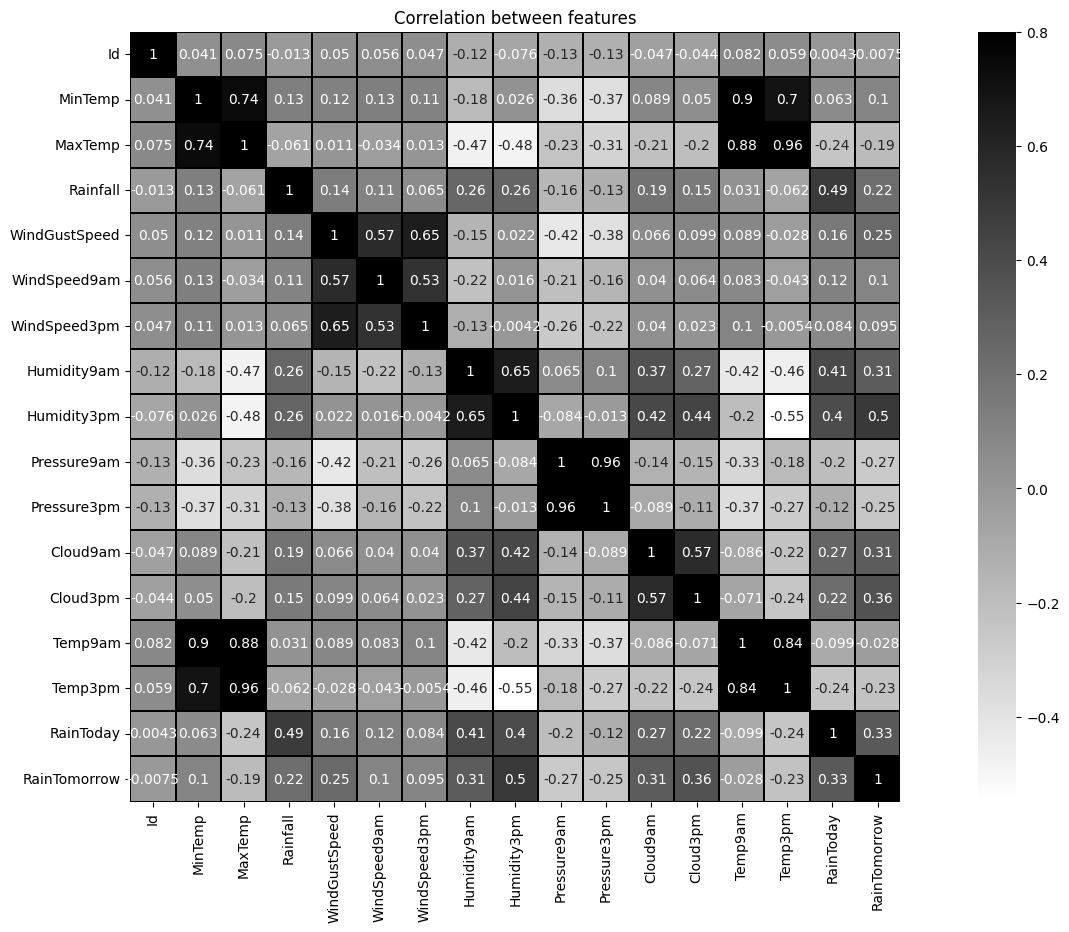

time: 1.39 s (started: 2023-06-26 12:39:32 +00:00)


In [17]:
corr = csmpa.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, cmap='binary', annot = True, linecolor ='black')
plt.title('Correlation between features')

**Observation:**

The Observations based on the Correlation Matrix.
- There is high Correlation between Rainfall and Rain Today
- There is high Correlation between, MaxTemp, Min Temp, Temp9am,Temp3pm
- There is high Correlation between Pressure 9am,Pressure3pm
- There is high Correlation between Cloud9am, Cloud3pm
- We will plot Graph to Check the Data Imbalance
- We will plot Graph and check the skewness of the data and further analyse the data where we need to handle the skewness of the data






<Axes: xlabel='RainTomorrow', ylabel='count'>

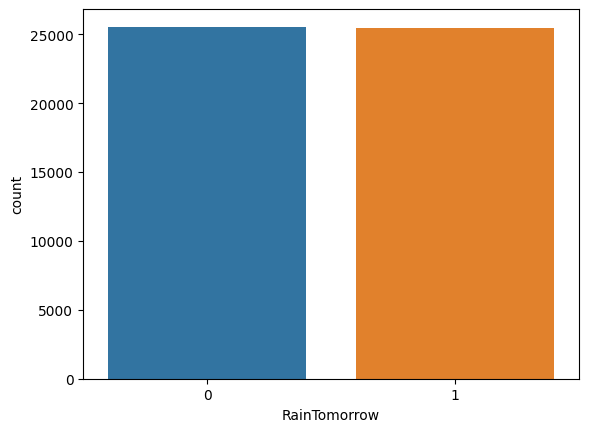

time: 220 ms (started: 2023-06-26 12:39:29 +00:00)


In [16]:
sns.countplot(x=csmpa['RainTomorrow'])

<a name = Section62></a>
### **6.2 Hist Plot**


**HISTOGRAM**

We will be plotting the Histogram of the Variables which would provide us insigth

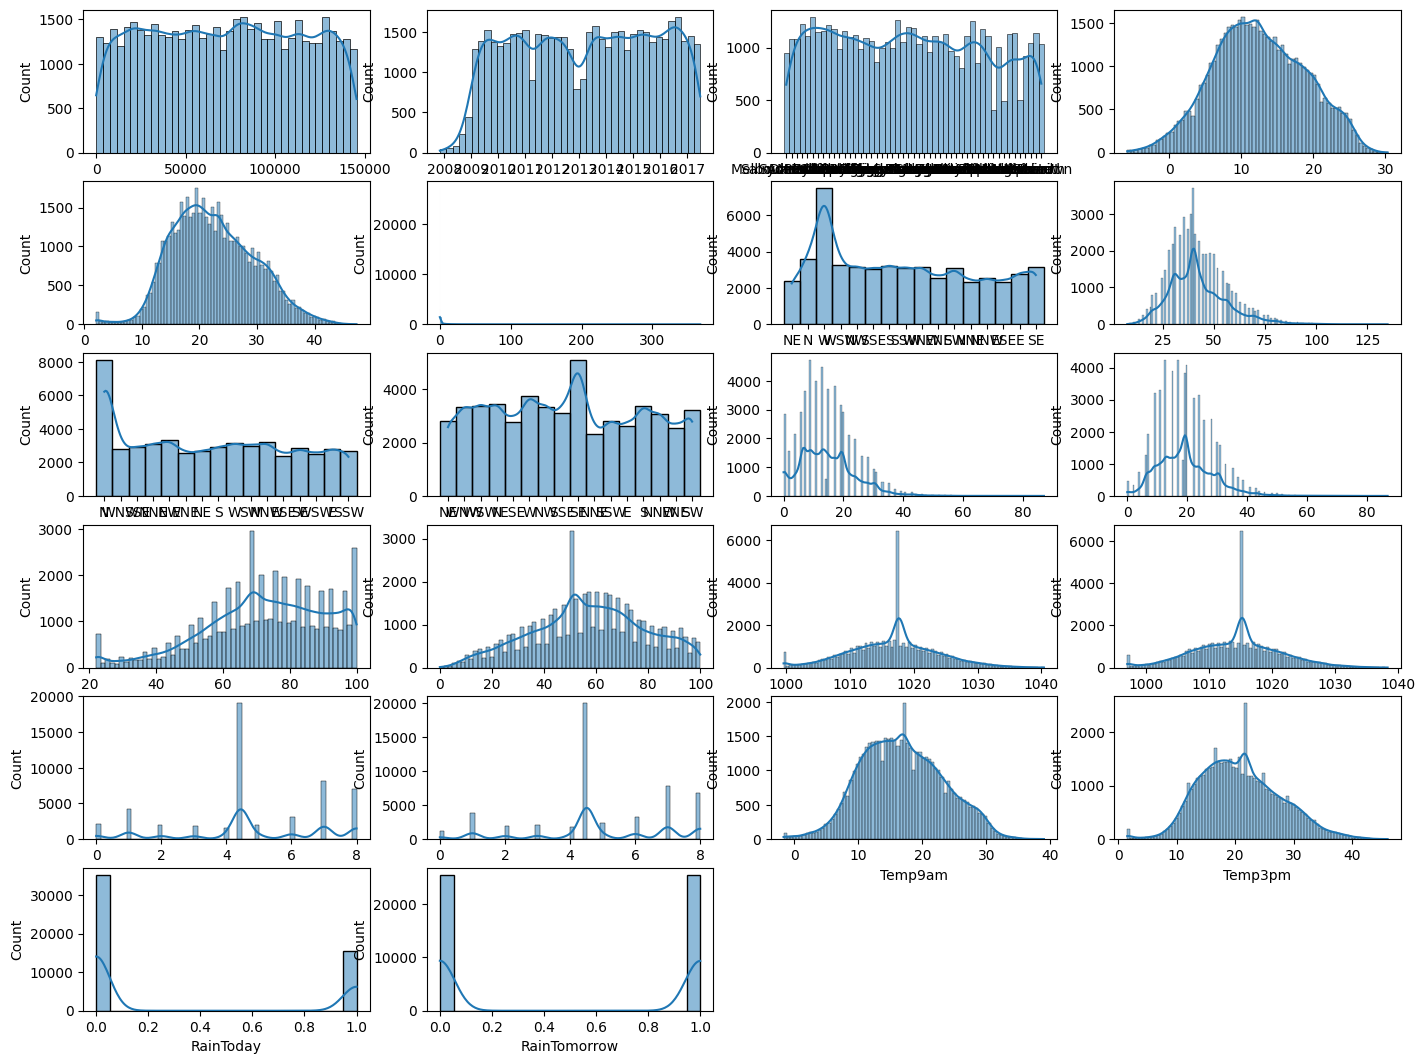

time: 19.5 s (started: 2023-06-26 12:39:40 +00:00)


In [18]:
plt.figure(figsize=(17,13))
for i in list(enumerate(csmpa.columns)):
    plt.subplot(6, 4, i[0]+1)
    sns.histplot(data = csmpa[i[1]], kde=True)

In [19]:
cat_features = [column_name for column_name in csmpa.columns if csmpa[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(cat_features)))
print("Categorical Features: ",cat_features)

Number of Categorical Features: 4
Categorical Features:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
time: 3.26 ms (started: 2023-06-26 12:40:00 +00:00)


<Axes: xlabel='WindDir3pm', ylabel='count'>

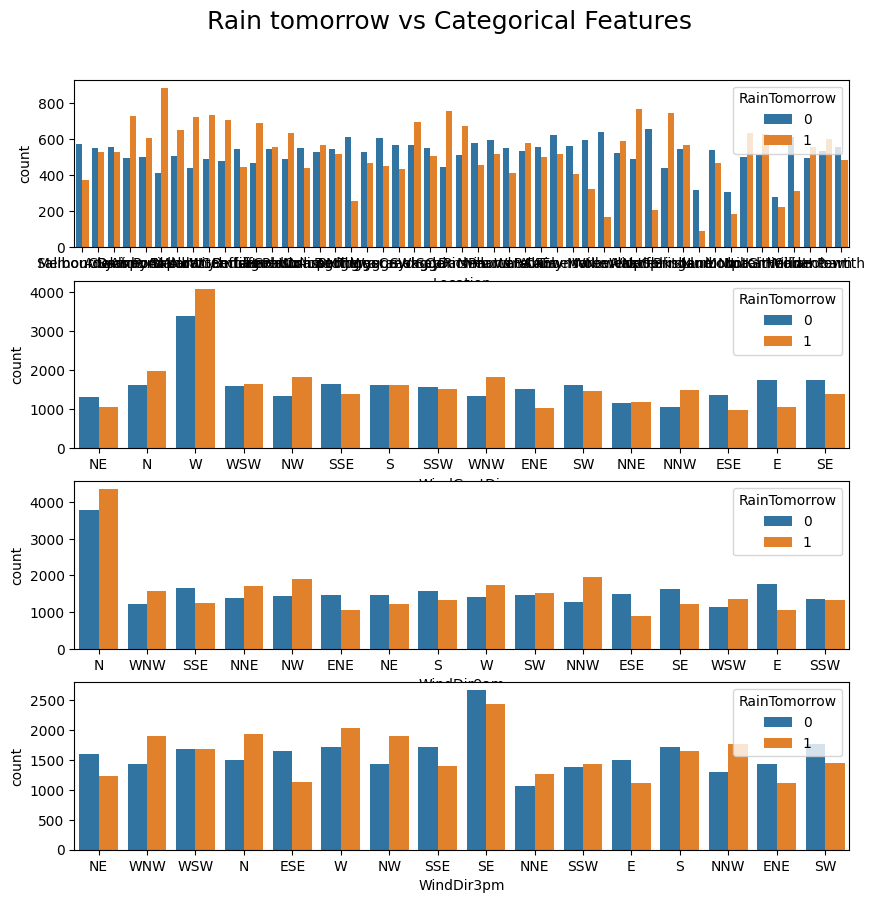

time: 2.04 s (started: 2023-06-26 12:40:02 +00:00)


In [20]:
figure, axes=plt.subplots (4, figsize=(10,10))
figure.suptitle("Rain tomorrow vs Categorical Features", fontsize=18, y=0.95)

sns.countplot(x ='Location', hue = "RainTomorrow", data = csmpa, ax=axes[0])
sns.countplot(x ='WindGustDir', hue = "RainTomorrow", data = csmpa, ax=axes[1])
sns.countplot(x ='WindDir9am', hue = "RainTomorrow", data = csmpa, ax=axes[2])
sns.countplot(x ='WindDir3pm', hue = "RainTomorrow", data = csmpa, ax=axes[3])



In [21]:
csmpaTEMP=csmpa[['MaxTemp','MinTemp','Temp9am', 'Temp3pm','RainTomorrow']]

time: 2.99 ms (started: 2023-06-26 12:40:14 +00:00)


<Figure size 1000x1000 with 0 Axes>

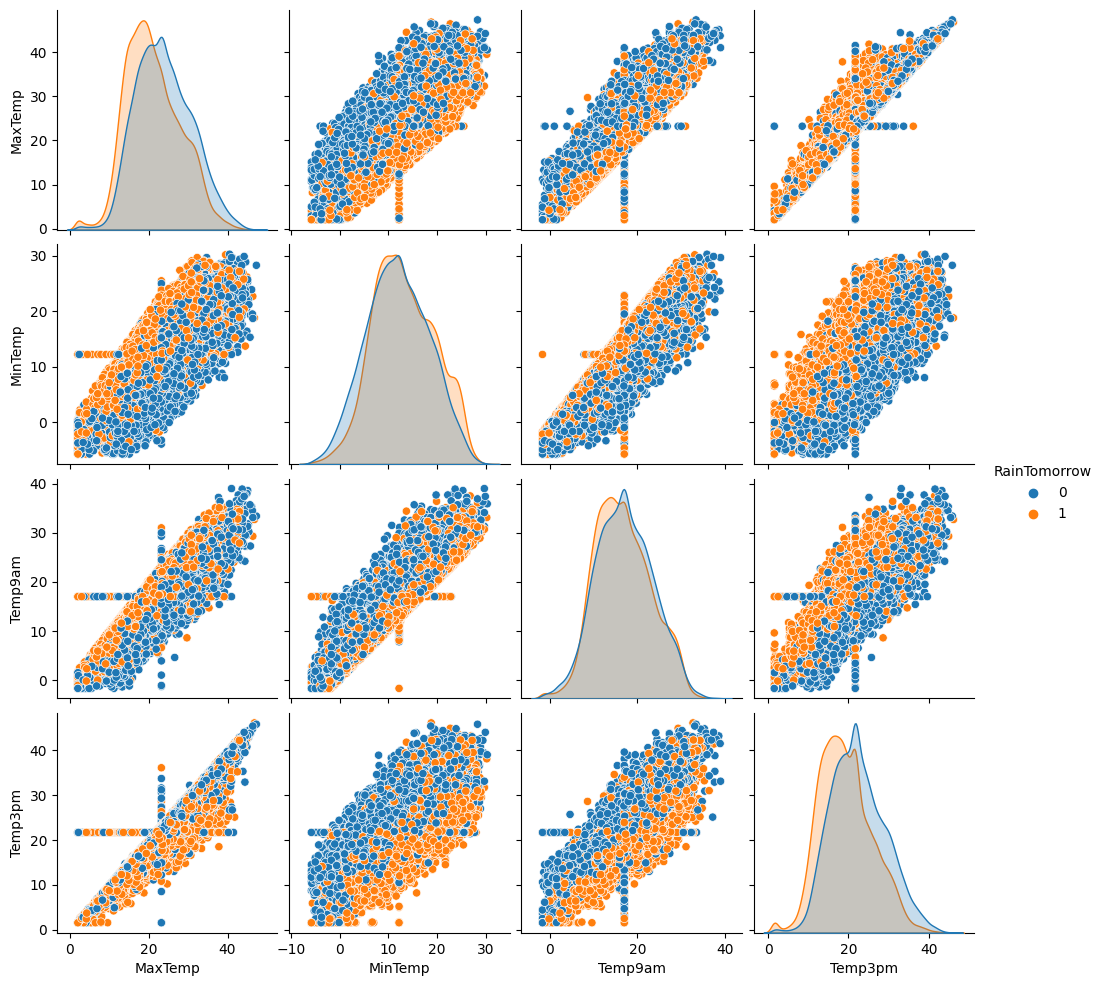

time: 1min 17s (started: 2023-06-26 08:14:40 +00:00)


In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(csmpaTEMP, hue='RainTomorrow')

<Figure size 500x500 with 0 Axes>

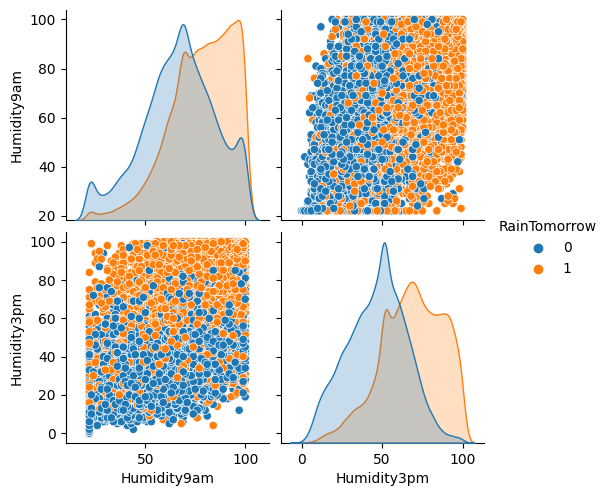

time: 19.2 s (started: 2023-06-26 12:40:48 +00:00)


In [22]:
csmpaHum=csmpa[['Humidity9am','Humidity3pm','RainTomorrow']]
plt.figure(figsize=(5,5))
sns.pairplot(csmpaHum, hue='RainTomorrow')

**Observations**
- There are multiple features with high co-relations.
- We will use reduction of Features by combining the features and check the model performance.
- We will also check the skew and normalize the data & check the model Performance.
- ID, Date & Location are Identifiers with no significant correlation with target, hence we will drop these features.
- The Categorical features we will us one hot encoding

[*Go Back to Index*](#Section0)<br>

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---
- We will convert the Continous Data to **Categorical Data**
- Now we will **perform encoding of the categorical columns** and **feed it** to the **LogisticRegression**.


<a name = Section71></a>
### **7.1 Feature Selection**



In [24]:
sk_val=csmpa.skew().sort_values(ascending=False)
sk_val

Rainfall         7.75376
WindGustSpeed    0.89585
RainToday        0.83977
WindSpeed9am     0.80306
WindSpeed3pm     0.65396
Temp3pm          0.30708
MaxTemp          0.27437
Temp9am          0.13553
MinTemp          0.04300
Pressure3pm      0.01132
Id               0.00724
RainTomorrow     0.00373
Pressure9am     -0.01415
Humidity3pm     -0.12074
Cloud3pm        -0.37793
Cloud9am        -0.39560
Humidity9am     -0.54540
dtype: float64

time: 52.3 ms (started: 2023-06-26 12:48:23 +00:00)


In [ ]:
#@title
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.compose import ColumnTransformer

time: 622 µs (started: 2023-06-26 08:16:11 +00:00)


In [ ]:
#@title
import math
import scipy.stats as ss


def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):

    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series


    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True

        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)

        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply log transformation
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply exp transformation
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew

        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()


    return DF


time: 2.98 ms (started: 2023-06-26 08:16:11 +00:00)


In [ ]:
#@title
# Separating dates by Day, Month, and Year
#csmpa['Date']=pd.to_datetime(csmpa['Date'])
#csmpa['Year']=csmpa['Date'].dt.year
#csmpa['Month']=csmpa['Date'].dt.month
#csmpa['Day']=csmpa['Date'].dt.day
#csmpa.drop('Date',axis=1,inplace=True)

time: 259 µs (started: 2023-06-26 08:16:11 +00:00)


In [ ]:
#@title
#csmpa['Temp']=csmpa[['MinTemp','MaxTemp','Temp3pm','Temp9am']].std(axis=1)
#csmpa['WindSpeed']=csmpa[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']].mean(axis=1)
#csmpa['Humidity']=csmpa[['Humidity9am','Humidity3pm']].mean(axis=1)
#csmpa['Presurre']=csmpa[['Pressure9am','Pressure3pm']].std(axis=1)
#csmpa['Cloud']=csmpa[['Cloud3pm','Cloud9am']].mean(axis=1)
#csmpa.head()

time: 382 µs (started: 2023-06-26 08:16:11 +00:00)


In [ ]:
#@title
csmpa.columns

In [28]:
#csmpa.drop(['Id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm'], axis=1, inplace=True)
csmpa.drop(['Id', 'Date', 'Location'], axis=1, inplace=True)

time: 9.23 ms (started: 2023-06-26 12:50:48 +00:00)



<a name = Section72></a>
### **7.2 Encoding Features**



In [29]:
csmpa.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE',
       'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
       'WindDir3pm

time: 3.84 ms (started: 2023-06-26 12:50:52 +00:00)


In [26]:
csmpa=pd.get_dummies(csmpa, columns=['WindGustDir','WindDir9am', 'WindDir3pm'], drop_first=True)

time: 62.3 ms (started: 2023-06-26 12:50:25 +00:00)


In [30]:
csmpa = csmpa.astype(int)

time: 16.1 ms (started: 2023-06-26 12:50:57 +00:00)


In [ ]:
#skew_autotransform(csmpa)


<a name = Section73></a>
### **7.3 Scaling**




from sklearn.preprocessing import StandardScaler

SSC=StandardScaler()
col=[ 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',]
csmpa[col]=SSC.fit_transform(csmpa[col])


from sklearn.preprocessing import MinMaxScaler


MMS=MinMaxScaler()
col=[  'RainToday', 'RainTomorrow', 'Temp', 'WindSpeed', 'Humidity',
       'Presurre', 'Cloud']
csmpa[col]=MMS.fit_transform(csmpa[col])

**Observations**
- We used the Scaling features as mentioned below
- 1. Standard Scaler
- 2. Min-Max Scaler
- 3. We used a function skew_autotransform
- Using each of this these Scalers we conducted trials on the Models, and in most cases the Model Performance was not good,
in Case of skew-transormer, the accuracy was low
in case of Scaler the val_accuracy was almost same, but the Variance was high with Train Accuracy almost 98.

hence we preffered not to use any scaling techniques


<a name = Section74></a>
### **7.4 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [31]:
X = csmpa.drop(['RainTomorrow'],axis=1)
y = csmpa['RainTomorrow']

time: 29 ms (started: 2023-06-26 12:55:49 +00:00)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 128)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (43352, 60) (43352,)
Testing Data Shape: (7651, 60) (7651,)
time: 62.2 ms (started: 2023-06-26 13:06:57 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name=Section8></a>

----
## **8. Model Development and Evaluation**
----

<a name=Section81></a>

### **8.1 Build the Model**

- Let's build our model.

- Here, we'll use a `Sequential` model with  densely connected hidden layers, and an output layer that returns  binary value.

  - Previously, we use the `model.add()` method to **add layers** to our sequential model, with activation RELU

  - Summarize the Model
  - Compile the Model which will contain the Optimizer, Loss and the Metrics to be evaluated
  -

In [60]:
input_shape=[len(X.keys())]
print(input_shape)

[60]
time: 890 µs (started: 2023-06-26 13:07:01 +00:00)


In [61]:
model=Sequential()
model.add(Dense(512, activation= 'relu', input_shape=[len(X.keys()),]))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2, activation='softmax'))


time: 84.8 ms (started: 2023-06-26 13:07:03 +00:00)


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               31232     
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 820,226
Trainable params: 820,226
Non-trainable params: 0
_________________________________________________________________
time: 48 ms (started: 2023-06-26 13:07:04 +00:00

In [63]:
# model compilation

model.compile(optimizer='Adam',loss='CategoricalCrossentropy', metrics=['accuracy'])

time: 18.4 ms (started: 2023-06-26 13:07:06 +00:00)


In [64]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

time: 2.62 ms (started: 2023-06-26 13:07:08 +00:00)


[*Go Back to Index*](#Section0)<br>

<a name=Section82></a>

### **8.2 Train the Model**

- We will define the Early Stop Callback
- Training the model for 100 epochs, and recording the training and validation accuracy in the `history` object.
- We can change these as per our requirements in the callback.
- Visualizing the model's training progress using the stats stored in the `history` object.

In [65]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20)

time: 492 µs (started: 2023-06-26 13:07:09 +00:00)


In [66]:
hist=model.fit(X_train,y_train_ohe,validation_data=(X_test,y_test_ohe), epochs=100, batch_size=128, callbacks=[early_stop], validation_split=0.2, verbose=True)

Epoch 1/100
339/339 [==============================] - 11s 29ms/step - loss: 2.2281 - accuracy: 0.6848 - val_loss: 0.5498 - val_accuracy: 0.7159
Epoch 2/100
339/339 [==============================] - 9s 27ms/step - loss: 0.5270 - accuracy: 0.7390 - val_loss: 0.5645 - val_accuracy: 0.7121
Epoch 3/100
339/339 [==============================] - 10s 29ms/step - loss: 0.5029 - accuracy: 0.7536 - val_loss: 0.4875 - val_accuracy: 0.7659
Epoch 4/100
339/339 [==============================] - 10s 28ms/step - loss: 0.4997 - accuracy: 0.7552 - val_loss: 0.5070 - val_accuracy: 0.7451
Epoch 5/100
339/339 [==============================] - 8s 24ms/step - loss: 0.4945 - accuracy: 0.7595 - val_loss: 0.4833 - val_accuracy: 0.7705
Epoch 6/100
339/339 [==============================] - 10s 29ms/step - loss: 0.4915 - accuracy: 0.7605 - val_loss: 0.5025 - val_accuracy: 0.7509
Epoch 7/100
339/339 [==============================] - 9s 28ms/step - loss: 0.4895 - accuracy: 0.7614 - val_loss: 0.4956 - val_accur

**Different Hyperparameters for tuning:** Objective is to have Low Bias, Low Variance & High Speed
1. Layers : Type of Layers, No. of Layers ( Balance Speed, Bias & Variance)
2. Neurons within the Layers: No. of Neurons (Increase accuracy)
3. Activation Functions: ( Accuracy & output type)
4. Optimizer: (Aimed @ accuracy&Speed.SGD is very slow)
5. Loss: (Speed and accuracy,low learningrate ensures slow learningbut better learning .High learning Rate oscillates)
6. Batch Size (Too High will affect speed)
7. Epochs (Aimed at accuracy,Too high will affect speed)

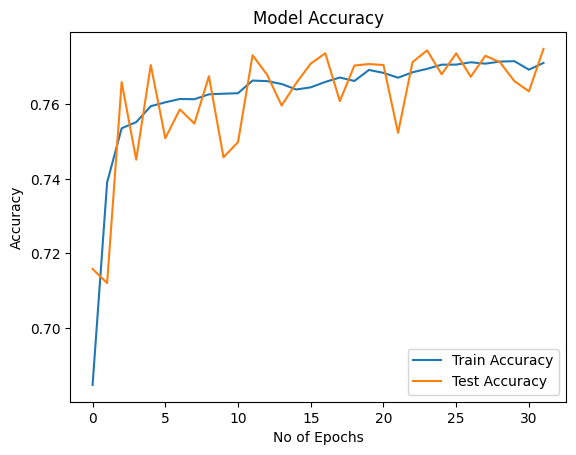

time: 18.8 s (started: 2023-06-26 13:13:23 +00:00)


In [67]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

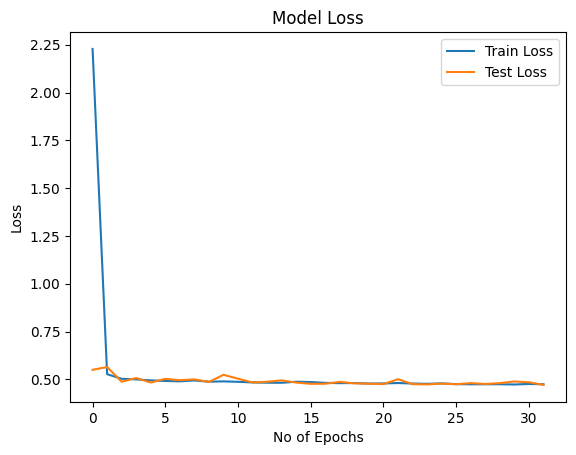

time: 293 ms (started: 2023-06-26 13:13:42 +00:00)


In [68]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(["Train Loss", "Test Loss"])
plt.show()

[*Go Back to Index*](#Section0)<br>

<a name=Section83></a>

### **8.3 Make Evaluation & Predictions**

- We will use the Test Data provided for Evaluation of the Model.
- The Test data is without the Dependent column
- We will use the model to predict the Rain Tomorrow.
- First we will prepare the test data to be used in the model prediction.
- Then we will use model.predict to Predict the Rain Tomorrow.
- Download the sample submission file for evalaution.

In [42]:
import io
from google.colab import files
uploaded = files.upload()

Saving aus_weather_test.xlsx to aus_weather_test.xlsx
time: 47.9 s (started: 2023-06-26 13:02:16 +00:00)


In [43]:
test_file = pd.read_excel(io.BytesIO(uploaded['aus_weather_test.xlsx']))# Dataset is now stored in a Pandas Dataframe

time: 12.1 s (started: 2023-06-26 13:03:06 +00:00)


In [44]:
test_file.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,41959,2015-11-16,Williamtown,13.40000,22.10000,35.40000,S,35.00000,SW,SSE,20.00000,22.00000,73.00000,55.00000,1019.40000,1018.00000,3.00000,1.00000,18.90000,21.40000,1
1,14497,2015-11-25,Moree,16.90000,37.70000,0.00000,NNE,41.00000,NNE,NNE,30.00000,17.00000,59.00000,20.00000,1014.00000,1009.10000,0.00000,2.00000,26.60000,35.90000,0
2,12429,2009-12-29,Moree,21.30000,23.80000,34.20000,ENE,30.00000,ESE,SE,11.00000,17.00000,90.00000,92.00000,1016.30000,1015.20000,8.00000,8.00000,23.00000,22.90000,1
3,75265,2009-10-13,Portland,7.20000,14.40000,9.60000,WNW,74.00000,NW,WNW,26.00000,30.00000,96.00000,91.00000,989.50000,990.40000,7.00000,8.00000,9.90000,11.20000,1
4,80668,2016-07-31,Watsonia,10.30000,16.30000,0.80000,N,56.00000,NNW,ENE,13.00000,9.00000,87.00000,55.00000,1017.00000,1014.60000,3.00000,2.00000,11.70000,15.80000,0


time: 64.4 ms (started: 2023-06-26 13:03:18 +00:00)


In [45]:
test_file.duplicated().value_counts()

False    12751
dtype: int64

time: 38.5 ms (started: 2023-06-26 13:03:18 +00:00)


In [ ]:
100*(test_file.shape[0] - test_file.count())/test_file.shape[0]

In [46]:
test_file.columns

Index(['Id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

time: 10.9 ms (started: 2023-06-26 13:03:18 +00:00)


In [ ]:
#@title
# Separating dates by Day, Month, and Year
#test_file['Date']=pd.to_datetime(test_file['Date'])
#test_file['Year']=test_file['Date'].dt.year
#test_file['Month']=test_file['Date'].dt.month
#test_file['Day']=test_file['Date'].dt.day
#test_file.drop('Date',axis=1,inplace=True)

In [47]:
ID=test_file['Id']

time: 657 µs (started: 2023-06-26 13:03:18 +00:00)


In [48]:
test_file.drop(['Id', 'Date', 'Location'], axis=1, inplace=True)

time: 14.4 ms (started: 2023-06-26 13:03:18 +00:00)


In [49]:
test_file=pd.get_dummies(test_file, columns=['WindGustDir','WindDir9am', 'WindDir3pm'], drop_first=True)

time: 19.2 ms (started: 2023-06-26 13:03:44 +00:00)


In [50]:
test_file = test_file.astype(int)

time: 5.66 ms (started: 2023-06-26 13:03:48 +00:00)


In [51]:
y_new=model.predict(test_file)


399/399 [==============================] - 2s 4ms/step
time: 3.8 s (started: 2023-06-26 13:03:56 +00:00)


In [52]:
y_new=pd.DataFrame(y_new)
y_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12751 entries, 0 to 12750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12751 non-null  float32
 1   1       12751 non-null  float32
dtypes: float32(2)
memory usage: 99.7 KB
time: 14.6 ms (started: 2023-06-26 13:04:02 +00:00)


In [53]:
y_new[1]=y_new[1].round(decimals=0)

time: 2.12 ms (started: 2023-06-26 13:04:06 +00:00)


In [54]:
y_new.insert(loc = 0,column = 'employee_id', value = ID )
y_new.rename(columns={1 :'status'}, inplace=True)
y_new.rename(columns={0 :'prob'}, inplace=True)
y_new.head()

,employee_id,prob,status
0,41959,0.66987,0.00000
1,14497,0.93924,0.00000
2,12429,0.08751,1.00000
3,75265,0.03215,1.00000
4,80668,0.55454,0.00000


time: 14.6 ms (started: 2023-06-26 13:04:25 +00:00)


In [55]:
y_new.drop(['prob'],axis=1, inplace=True)

time: 2.1 ms (started: 2023-06-26 13:04:29 +00:00)


In [56]:
y_new.head(15)

,employee_id,status
0,41959,0.00000
1,14497,0.00000
2,12429,1.00000
3,75265,1.00000
4,80668,0.00000
5,11425,0.00000
6,64429,0.00000
7,141418,1.00000
8,117357,1.00000
9,65383,1.00000


time: 12 ms (started: 2023-06-26 13:04:32 +00:00)


In [57]:
submission=y_new

time: 458 µs (started: 2023-06-26 13:04:36 +00:00)


In [58]:

submission.to_csv('sample_submission.csv', index=False, header=False)
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 35.9 ms (started: 2023-06-26 13:04:42 +00:00)


[*Go Back to Index*](#Section0)<br>

**CONLUSION**
- We have tried various alterations in the Model, but the best result for val_accuracy we achieved is 75.
-